# Part 1

### Question 1

In [1]:
table = {'read1':'1294_S1_L008_R1_001.fastq.gz', 'index1' : '1294_S1_L008_R2_001.fastq.gz', 'read2' :'1294_S1_L008_R4_001.fastq.gz', 'index2': '1294_S1_L008_R3_001.fastq.gz'}

for item in table:
    print(item, table[item], sep='\t')

read1	1294_S1_L008_R1_001.fastq.gz
index1	1294_S1_L008_R2_001.fastq.gz
read2	1294_S1_L008_R4_001.fastq.gz
index2	1294_S1_L008_R3_001.fastq.gz


#### Code for generating per base call averages of quality scores for reads and indexes is attached and called "Demultiplexing.py"

+ It took a little over 24 hours to generate the per base averages for each of the reads. The indexes took ~4 hours each. 

### Part 2a
I had some trouble using matplotlib directly on talapas so I saved the means of each position to a tsv file. 


Text(0.5,1,'Mean Quality Scores from Read 1')

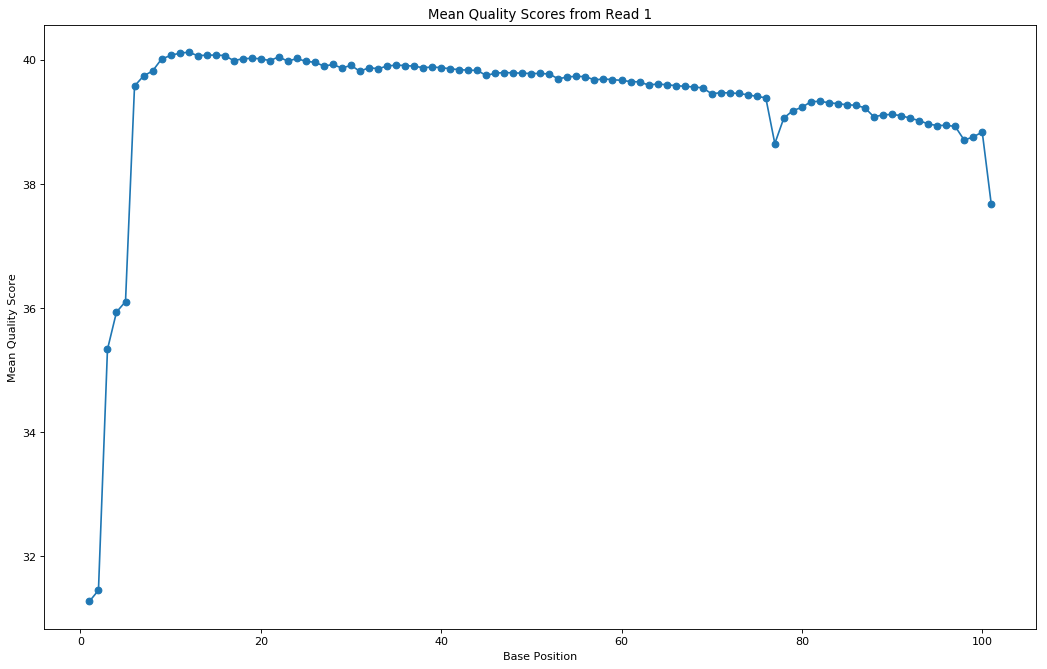

In [13]:
file = 'mean_1294_S1_L008_R1_001.fastq.gz.tsv'
x = []
y = []

with open(file, 'r') as fh:
    for line in fh:
        line = line.strip().split('\t')
        x.append(float(line[0]) + 1)
        y.append(float(line[1]))
        
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.plot(x, y, marker='o')
plt.xlabel('Base Position')
plt.ylabel('Mean Quality Score')
plt.title('Mean Quality Scores from Read 1')

Text(0.5,1,'Mean Quality Scores from Index 1')

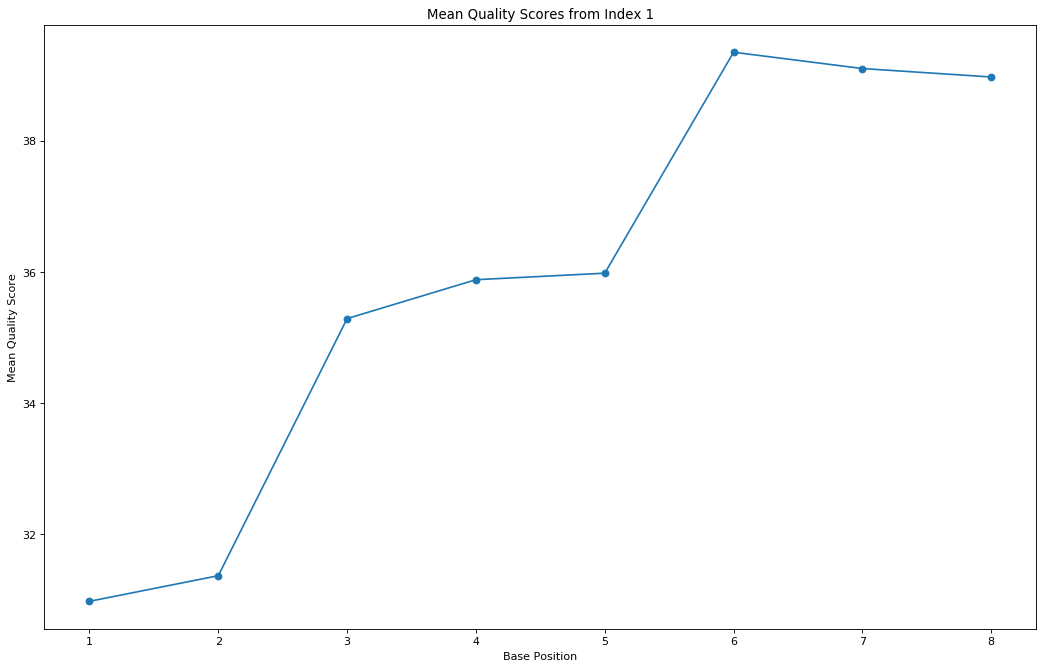

In [12]:
file = 'mean_1294_S1_L008_R2_001.fastq.gz.tsv'
x = []
y = []

with open(file, 'r') as fh:
    for line in fh:
        line = line.strip().split('\t')
        x.append(float(line[0]) + 1)
        y.append(float(line[1]))
        
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.plot(x, y, marker='o')
plt.xlabel('Base Position')
plt.ylabel('Mean Quality Score')
plt.title('Mean Quality Scores from Index 1')

Text(0.5,1,'Mean Quality Scores from Read 2')

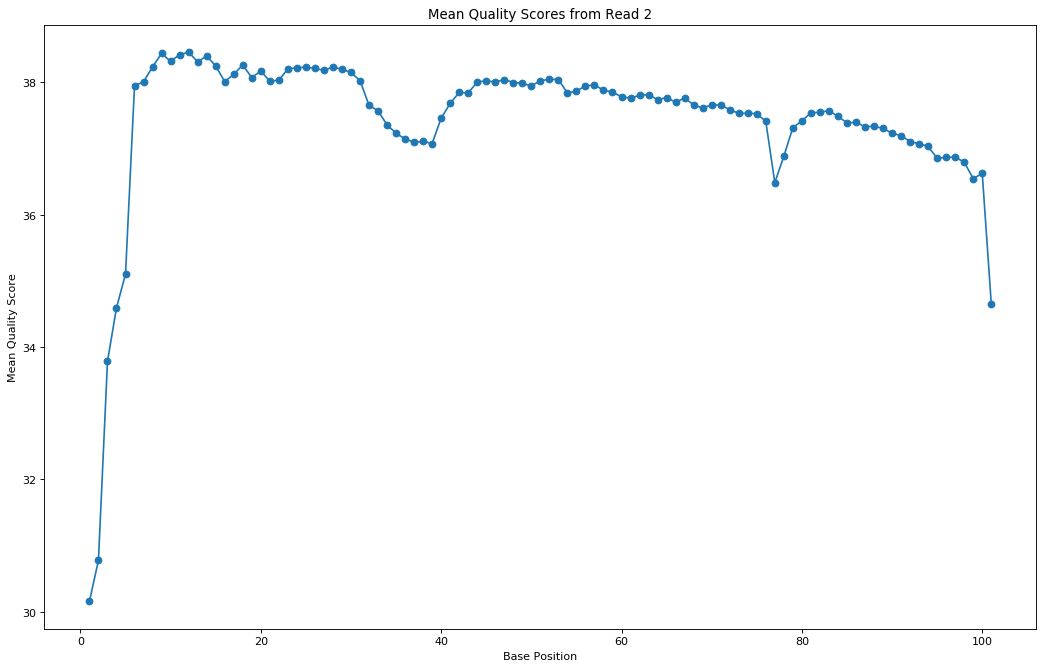

In [10]:
file = 'mean_1294_S1_L008_R4_001.fastq.gz.tsv'
x = []
y = []

with open(file, 'r') as fh:
    for line in fh:
        line = line.strip().split('\t')
        x.append(float(line[0]) + 1)
        y.append(float(line[1]))
        
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.plot(x, y, marker='o')
plt.xlabel('Base Position')
plt.ylabel('Mean Quality Score')
plt.title('Mean Quality Scores from Read 2')

Text(0.5,1,'Mean Quality Scores from Index 2')

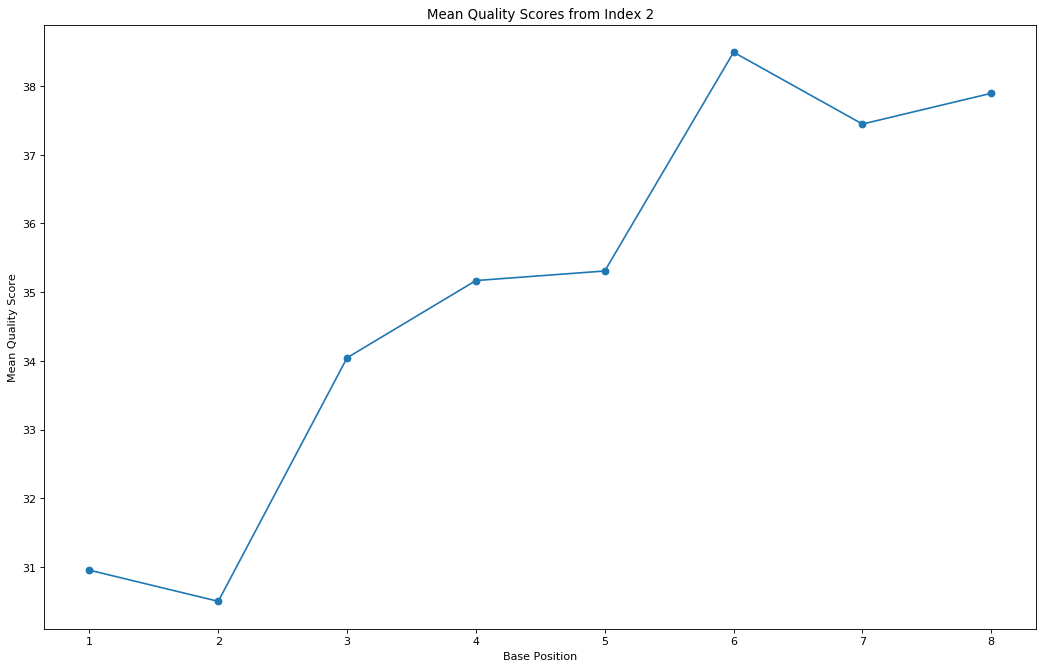

In [11]:
file = 'mean_1294_S1_L008_R3_001.fastq.gz.tsv'
x = []
y = []

with open(file, 'r') as fh:
    for line in fh:
        line = line.strip().split('\t')
        x.append(float(line[0]) + 1)
        y.append(float(line[1]))
        
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.plot(x, y, marker='o')
plt.xlabel('Base Position')
plt.ylabel('Mean Quality Score')
plt.title('Mean Quality Scores from Index 2')

### Part 2b)
+ What is a good quality score cutoff for index reads and pairs to utilize for sample identification and downstream analysis, respectively?

    + I think any index that has an undetermined base (N) should not be used for sample identification and downstream analysis. 
    + For sequencing reads, I think there should be a cutoff 

### Part 2c)
+ The number of indices that have Undetermined (N) base calls: **3976613** in R2, **3328051** in R3. 

$ zcat 1294_S1_L008_R2_001.fastq.gz |sed -n '2~4p' | grep 'N' | wc -l

$ zcat 1294_S1_L008_R3_001.fastq.gz |sed -n '2~4p' | grep 'N' | wc -l

# Part 2

# Files

The files to be demultiplexed are in: /projects/bgmp/shared/2017_sequencing

Read 1 file goes with Index 1

Read 2 file goes with Index 2

The headers should be identical if the index and the reads really match


### Goals:

+ How much index swapping is occurring?
+ Separate reads by index (demultiplex)
+ If the index is undetermined (eg 'N' in the sequence) separate those out. 
+ If the sequence quality is below threshold, also filter out. 

### The problem:
+ Indexes and reads are in separate files, with only one identification number

### Input:

+ 2 Biological reads with 2 index reads
+ Each of these files contains info from a whole lane, there are 400 million x 4 lines 

Read then index Group 1 (1 and 2):

 1294_S1_L008_R1_001.fastq.gz
 
 1294_S1_L008_R2_001.fastq.gz
 
Read then index Group 2 (3 and 4): 

 1294_S1_L008_R4_001.fastq.gz
 
 1294_S1_L008_R3_001.fastq.gz 
 
 ### Output:
 + One forward, one reverse file per index (24 indices) 
 + One forward, one reverse file per unknown index, low quality, or swapped index pairs (1)
 + Number of properly matched indices per index
 + Level of index swapping observed (percentage of total reads that have swapped indices).
 
 #### Notes:
 + Use numpy when calculating things
 
 + $ zcat 1294_S1_L008_R4_001.fastq.gz | sed -n '1~4p'|wc -l gives the number of reads which is:
 
 363,246,735
 

# PLN

### 1. Sorting the Indices

+ start by making two dictionaries of position:index sequence pairs. Since the position is the same for each read in all of the files, I can just save the positional information. 

+ once these dictionaries are complete, I could compare across them:

+ Undetermined: If there is an N in either of the indexes, note that.

+ Low quality: If the average quality score across the read is lower than the average across all reads in the flow cell, note that. 
    
+ Unswapped: If both indices do not have an N, Compare index files (1294_S1_L008_R2_001.fastq.gz and 1294_S1_L008_R3_001.fastq.gz), and if they are the same, note that. Also, save the position: index in a dictionary for the output filename. Count these separately.

+ Swapped: If they are not the same, and thus have some index swapping, note that.  

+ Make sure that all these options, either 'Undetermined', 'Low Quality', 'Unswapped', or 'Swapped' are saved into a dictionary with the position of the read as the key, and the option as the value. 
 

### 2. Aligning index with sequence reads

Fits into 'Unswapped' step of sorting the indices

+ while iterating through the index file, make a dictionary with the read unique part of the header "@K00337:83:HJKJNBBXX:8:1101:**1265**:1191" with the value as the name of the index (B1, A5 etc). OR "undetermined" if there are Ns.
    + Should have a dictionary with keys as index sequence and values as the name of the index. 


### 3. Making appropriate read files

Define a function for this step. Any time I will be applying the same code to multiple files, I will define a function. 

For each read file:

+ Go through each line of the read file, counting the number of entries. 
+ For the read, look up the corresponding position in the sorted index output
+ Write 'Undetermined' and 'Swapped' to its own file, r1_und
+ Write the 'Unswapped' entire entry to files named r1_ind_{index name}.fq using the dictionary created in the previous step. 


# Unit tests

Input files:

   + 4 separate files, two with indexes, two with reads
   + Each file should have 6 entries
   + 2 should be swapped, 3 should be unswapped, 1 should be undetermined. 
   + Need to be in fastq format
   + Needs similar header lines to the actual files
    
How should I make the input files? 

   + Pick the first six entries from each file and modify so it matches the above. Only the index files needed to be changed. 
   + file names: 
       + index_test_1.txt  
       + index_test_2.txt
       + read_test_1.txt  
       + read_test_2.txt
   + They are text files because my text editor doesn't like opening .fqs for some reason, but it is in the correct format. 
    
Expected output:

   + There should be two output files for each barcode, one containing the forward reads and one containing the reverse reads. There should be two additional files for the undetermined, low quailty, or swapped reads. For my unit test, there should be the following output files:
   
       + forward_AGGATAGC.txt
       + reverse_AGGATAGC.txt
       + forward_GTAGCGTA.txt
       + reverse_GTAGCGTA.txt
       + forward_TATGGCAC.txt
       + reverse_TATGGCAC.txt
       + forward_undetermined.txt
       + reverse_undetermined.txt
       
   + They are text files because my text editor doesn't like opening .fqs for some reason, but it is in the correct format. 